# Determining the age of buyers

## Exploratory data analysis

In [1]:
import pandas as pd
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=Warning)


In [2]:
df = pd.read_csv('datasets/pics/gt_avg_train.csv')

In [3]:
df

,file_name,num_ratings,apparent_age_avg,apparent_age_std,real_age
0,000000.jpg,36,5.000000,1.146423,4
1,000001.jpg,63,20.079365,4.096819,18
2,000002.jpg,38,76.815789,6.133009,80
3,000003.jpg,38,55.657895,7.864653,50
4,000004.jpg,15,17.666667,3.457222,17
...,...,...,...,...,...
4108,004108.jpg,14,39.000000,4.945861,41
4109,004109.jpg,13,55.230769,7.917847,53
4110,004110.jpg,131,36.923664,4.785585,35
4111,004111.jpg,12,26.833333,2.855086,28


No missing values, column names normal, 4113 records

In [4]:
df.isna().sum()

file_name           0
num_ratings         0
apparent_age_avg    0
apparent_age_std    0
real_age            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   file_name         4113 non-null   object 
 1   num_ratings       4113 non-null   int64  
 2   apparent_age_avg  4113 non-null   float64
 3   apparent_age_std  4113 non-null   float64
 4   real_age          4113 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 160.8+ KB


Distribution graph was built

There is quite a lot of records around 0 age. Maybe someone who does not have data assigned 0?

Additional graph showed that this hypothesis seems to be incorrect

array([<AxesSubplot:title={'center':'real_age'}>], dtype=object)

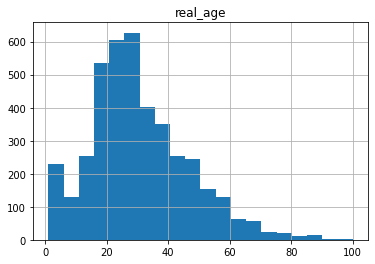

In [6]:
fig, axes = plt.subplots(facecolor='white')
df.hist(column='real_age', bins=20, ax=axes)

In [7]:
df.describe()

,num_ratings,apparent_age_avg,apparent_age_std,real_age
count,4113.000000,4113.000000,4113.000000,4113.000000
mean,32.563822,30.191974,4.148088,30.476052
std,30.359605,14.747757,1.758278,16.312428
min,10.000000,0.923077,0.000000,1.000000
25%,14.000000,21.705882,2.999084,19.000000
50%,23.000000,28.071429,4.152835,28.000000
75%,38.000000,37.750000,5.227491,40.000000
max,383.000000,89.153846,12.604012,100.000000


array([<AxesSubplot:title={'center':'real_age'}>], dtype=object)

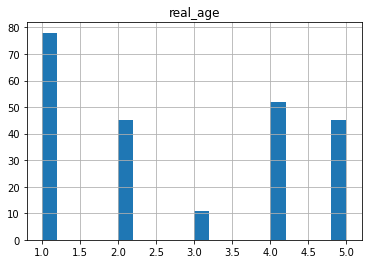

In [8]:
fig, axes = plt.subplots(facecolor='white')

df.query('real_age < 6').hist(column='real_age', bins=20, ax=axes)

Проверяем есть ли на каждую запись в df соответсвующая картинка

In [9]:
images = pd.DataFrame([os.path.normpath(file ) for file in glob.iglob('datasets/pics/train/*jpg_face.jpg', recursive=False)])
images.columns = ['name']

In [10]:
images

,name
0,datasets\pics\train\000000.jpg_face.jpg
1,datasets\pics\train\000001.jpg_face.jpg
2,datasets\pics\train\000002.jpg_face.jpg
3,datasets\pics\train\000003.jpg_face.jpg
4,datasets\pics\train\000004.jpg_face.jpg
...,...
4108,datasets\pics\train\004108.jpg_face.jpg
4109,datasets\pics\train\004109.jpg_face.jpg
4110,datasets\pics\train\004110.jpg_face.jpg
4111,datasets\pics\train\004111.jpg_face.jpg


In [11]:
images1 = images['name'].str.split(pat=r'\\', n=- 1, expand=True)
images1 = images1.drop([0, 1, 2], axis=1)
images1['name'] = images['name']
images1[3] = images1[3].str.replace('_face.jpg', '')
df = images1.merge(df, left_on=3, right_on='file_name')

In [12]:
df

,3,name,file_name,num_ratings,apparent_age_avg,apparent_age_std,real_age
0,000000.jpg,datasets\pics\train\000000.jpg_face.jpg,000000.jpg,36,5.000000,1.146423,4
1,000001.jpg,datasets\pics\train\000001.jpg_face.jpg,000001.jpg,63,20.079365,4.096819,18
2,000002.jpg,datasets\pics\train\000002.jpg_face.jpg,000002.jpg,38,76.815789,6.133009,80
3,000003.jpg,datasets\pics\train\000003.jpg_face.jpg,000003.jpg,38,55.657895,7.864653,50
4,000004.jpg,datasets\pics\train\000004.jpg_face.jpg,000004.jpg,15,17.666667,3.457222,17
...,...,...,...,...,...,...,...
4108,004108.jpg,datasets\pics\train\004108.jpg_face.jpg,004108.jpg,14,39.000000,4.945861,41
4109,004109.jpg,datasets\pics\train\004109.jpg_face.jpg,004109.jpg,13,55.230769,7.917847,53
4110,004110.jpg,datasets\pics\train\004110.jpg_face.jpg,004110.jpg,131,36.923664,4.785585,35
4111,004111.jpg,datasets\pics\train\004111.jpg_face.jpg,004111.jpg,12,26.833333,2.855086,28


In [13]:
df = df[['name', 'real_age']]

Created a df where 1 column is the path, the second is the real age

In [14]:
df

,name,real_age
0,datasets\pics\train\000000.jpg_face.jpg,4
1,datasets\pics\train\000001.jpg_face.jpg,18
2,datasets\pics\train\000002.jpg_face.jpg,80
3,datasets\pics\train\000003.jpg_face.jpg,50
4,datasets\pics\train\000004.jpg_face.jpg,17
...,...,...
4108,datasets\pics\train\004108.jpg_face.jpg,41
4109,datasets\pics\train\004109.jpg_face.jpg,53
4110,datasets\pics\train\004110.jpg_face.jpg,35
4111,datasets\pics\train\004111.jpg_face.jpg,28


Trying to make ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(rescale=1./255)

train_datagen_flow = datagen.flow_from_dataframe(
    dataframe = df, 
    x_col='name',
    y_col = 'real_age',
    target_size = (150, 150),
    class_mode = 'raw',
    batch_size = 16,
    seed = 12345)

Found 4113 validated image filenames.


Checking some images

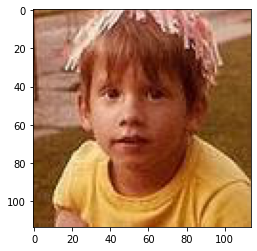

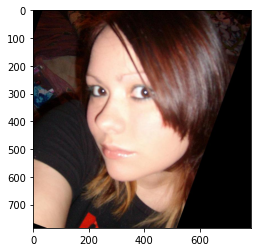

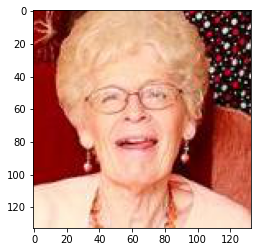

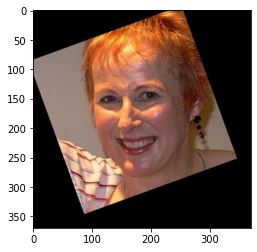

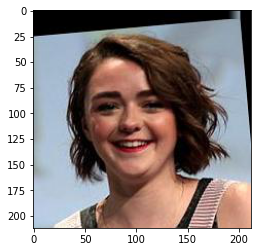

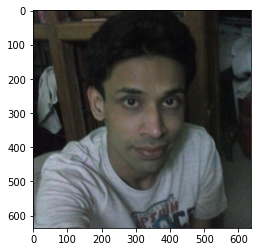

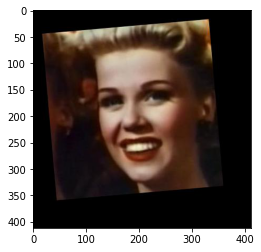

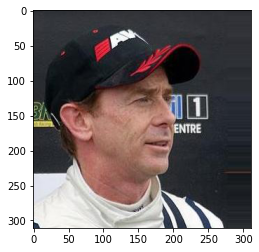

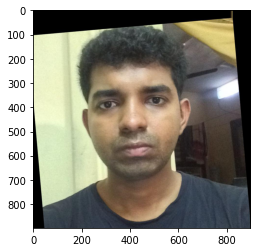

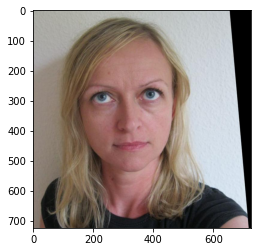

In [16]:
for x in range(10):
    print()
    image = Image.open(df.iloc[x , 0])
    plt.imshow(np.array(image)) 
    plt.show()

Checking images of people with real age == 1. Just in case

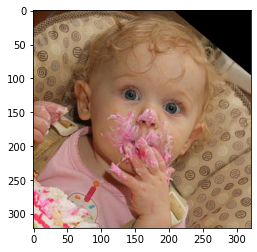

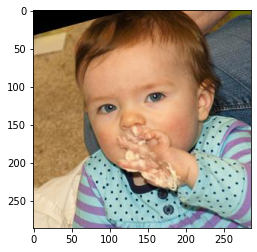

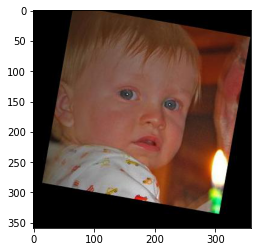

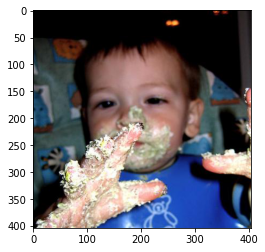

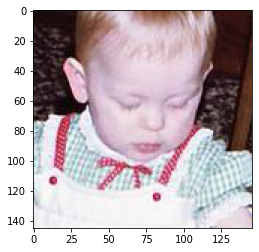

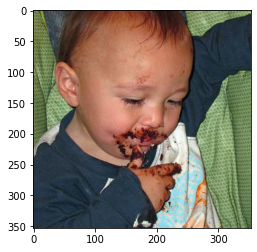

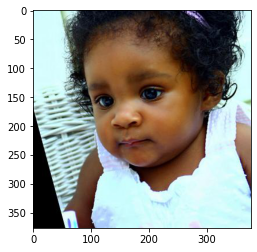

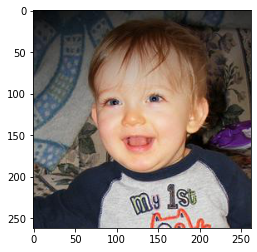

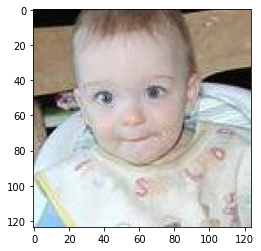

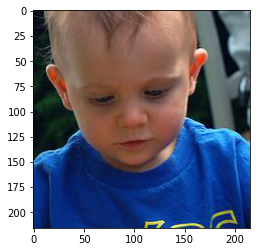

In [17]:
df1 = df.query('real_age == 1')
for x in range(10):
    print()
    image = Image.open(df1.iloc[x, 0])
    plt.imshow(np.array(image)) 
    plt.show()

[Text(0.5, 1.0, 'Distribution of people in sample by age'),
 Text(0, 0.5, 'Observations'),
 Text(0.5, 0, 'Age')]

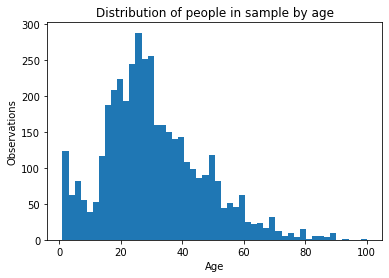

In [18]:
fig, axes = plt.subplots(facecolor='white')
plt.hist(df['real_age'], bins=50, axes=axes)
plt.gca().set(title='Distribution of people in sample by age', ylabel='Observations', xlabel='Age')

**Conclusions**

1. The database contains data for all ages
2. It is unlikely that we are interested in children for work. The most important age is around 18 (for selling alcohol)
3. Maybe, for our  task, we can try to divide them into groups - children / youth / adults and the elderly. Then it would be easier to predict + there would be no problem that the main array of photographs is about 20 years old, and there are very few elderly people

## Model training

In [19]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

def load_train(path):
    df = pd.read_csv(path + 'gt_avg_train.csv')
    df['file_name'] = df['file_name'].str.replace('.jpg', '.jpg_face.jpg')
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25, horizontal_flip = True, vertical_flip = True)

    train_datagen_flow = datagen.flow_from_dataframe(
    dataframe=df,
    directory=path+'/train',    
    x_col= 'file_name',
    y_col = 'real_age',
    target_size = (224, 224),
    class_mode = 'raw',
    subset='training',
    seed = 12345)


    return train_datagen_flow 

def load_val(path):
    df1 = pd.read_csv(path + 'gt_avg_train.csv')
    df1['file_name'] = df1['file_name'].str.replace('.jpg', '.jpg_face.jpg')

    datagen1 = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    val_datagen_flow = datagen1.flow_from_dataframe(
    dataframe=df1,
    directory=path+'/train',    
    x_col='file_name',
    y_col = 'real_age',
    target_size = (224, 224),
    class_mode = 'raw',
    subset='validation',
    seed = 12345)

    return val_datagen_flow 

def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                    weights='imagenet', 
                    include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(lr=0.0002)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
 
    return model
 
 
def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
    return model


In [20]:
train_data1 = load_train('datasets/pics/')
val_data1 = load_val('datasets/pics/')
model1 = create_model((224, 224, 3))

Found 3085 validated image filenames.
Found 1028 validated image filenames.


In [21]:
model2 = train_model(model1, train_data1, val_data1)

Epoch 1/10
97/97 - 686s - loss: 347.2193 - mae: 13.8710 - val_loss: 1106.3385 - val_mae: 28.8249 - 686s/epoch - 7s/step
Epoch 2/10
97/97 - 650s - loss: 120.2712 - mae: 8.4853 - val_loss: 609.8270 - val_mae: 19.7723 - 650s/epoch - 7s/step
Epoch 3/10
97/97 - 641s - loss: 96.1183 - mae: 7.5765 - val_loss: 750.9478 - val_mae: 22.5127 - 641s/epoch - 7s/step
Epoch 4/10
97/97 - 643s - loss: 76.0919 - mae: 6.7029 - val_loss: 430.8499 - val_mae: 15.6974 - 643s/epoch - 7s/step
Epoch 5/10
97/97 - 655s - loss: 65.4724 - mae: 6.1880 - val_loss: 444.9233 - val_mae: 15.8394 - 655s/epoch - 7s/step
Epoch 6/10
97/97 - 683s - loss: 59.2758 - mae: 5.8637 - val_loss: 398.2761 - val_mae: 15.1397 - 683s/epoch - 7s/step
Epoch 7/10
97/97 - 682s - loss: 48.5215 - mae: 5.4035 - val_loss: 238.8362 - val_mae: 10.9687 - 682s/epoch - 7s/step
Epoch 8/10
97/97 - 650s - loss: 42.9647 - mae: 5.0668 - val_loss: 208.5119 - val_mae: 10.5843 - 650s/epoch - 7s/step
Epoch 9/10
97/97 - 644s - loss: 38.4126 - mae: 4.7502 - val_

## Model testing

In [22]:
def load_test(path):
    df1 = pd.read_csv(path + 'gt_avg_test.csv')
    df1['file_name'] = df1['file_name'].str.replace('.jpg', '.jpg_face.jpg')

    datagen1 = ImageDataGenerator(rescale=1./255)

    test_datagen_flow = datagen1.flow_from_dataframe(
    dataframe=df1,
    directory=path+'/test',    
    x_col='file_name',
    y_col = 'real_age',
    target_size = (224, 224),
    class_mode = 'raw',
    seed = 12345)

    return test_datagen_flow, df1

In [23]:
test_data1, test_df = load_test('datasets/pics/')

Found 1978 validated image filenames.


In [24]:
test_df['est_age']= model2.predict(test_data1)

62/62 [==============================] - 74s 1s/step


In [25]:
test_df['diff']= test_df['est_age']-test_df['real_age']

In [32]:
print('MAE on test', test_df['diff'].abs().sum()/len(test_df))

MAE on test 21.893616161026678


In [50]:
age1 = 0
age2 = 0
for_graph = pd.DataFrame()
for x in range(5, 105, 5):
    age1 = age2
    age2 = x
    temp = test_df.query('real_age > @age1 and real_age <= @age2')
    z = temp['diff'].abs().sum()/len(temp)
    zz = '{} - {}'.format(age1, age2)
    z = pd.DataFrame({'Age range': zz, 'MAE':z}, index=[0])
    for_graph = pd.concat([for_graph, z])

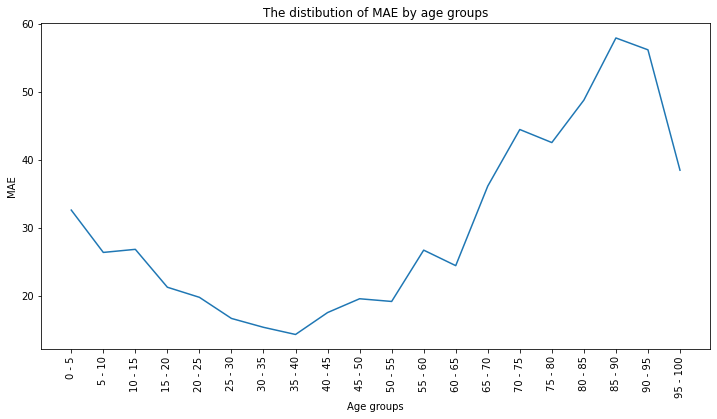

In [63]:
fig, axes = plt.subplots(facecolor='white', figsize=(12,6))
plt.plot(for_graph['Age range'], for_graph['MAE'])   
plt.xticks(rotation=90)
plt.xlabel('Age groups')
plt.ylabel('MAE')
plt.title('The distibution of MAE by age groups')
plt.show()

## Analysis of the trained model

**Conclusions**

1. Data has been analyzed, uploaded. model calculated
2. The error on a validation group are quite significant (8,1), on test data it's even worse 21. Probably it's better to have bigger train size and more transformation to that data to have a better results.
3. The biggest errors - for the elderly, the model is most accurate in determining age for 35-40 years range.